## Importing Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn

# Required Sub-library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

# Models
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn import neighbors


# Optional Library
from google.colab import data_table

## Importing Data

In [ ]:
df = pd.read_excel("/content/Mole Fraction Composition with noise.xlsx")

In [ ]:
X = df.iloc[:,:-2]
y = df.loc[:,["To Condenser - Master Comp Mole Frac (TetraHyFuran)"]]

In [ ]:
X.head()

,Time,Condenser - Liquid Percent Level,Condenser - Vessel Pressure,Reboiler - Vessel Liq Percent Level,Feed2 - Mass Flow,To Reboiler - Mass Flow,To Condenser - Mass Flow,Main Tower - Stage Liq Net Mass Flow (2__Main Tower),To Reboiler - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (Toluene),Main Tower - Stage Temperature (5__Main Tower),T-100 - Stage Pressure (5__Main Tower),T-100 - Botttom Stage Temp Est,T-100 - Top Stage Temp Est,T-100 - Reflux Ratio,T-100 - Duties Summary (Reboiler),To Condenser - Master Comp Mole Frac (TetraHyFuran)
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0,0.966281
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0,0.965788
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0,0.965758
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0,0.965756
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0,0.965784


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Models list

In [ ]:
# [1. XGBoost]

# We call our model as "xgb_regressor"
xgb_regressor = XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Perform 10-fold cross-validation
scores_xgb = cross_val_score(estimator = xgb_regressor,
                             scoring   ='neg_mean_absolute_error', 
                             X         = X_train, 
                             y         = y_train, 
                             cv        = 3);


[14:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# [2. SVM Regressor]

# We call our model as "svm_regressor"
svm_regressor = svm.SVR()

# Train the regressor
svm_regressor.fit(X_train, y_train)

# Perform 10-fold cross-validation
scores_svm = cross_val_score(estimator = svm_regressor,
                             scoring   ='neg_mean_absolute_error', 
                             X         = X_train, 
                             y         = y_train, 
                             cv        = 3);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# [3. Decision Tree]

# We call our model as "tree_regressor"
tree_regressor = tree.DecisionTreeRegressor()

# Train the regressor
tree_regressor.fit(X_train, y_train)

# Perform 10-fold cross-validation
scores_tree = cross_val_score(estimator = tree_regressor,
                             scoring   ='neg_mean_absolute_error', 
                             X         = X_train, 
                             y         = y_train, 
                             cv        = 3);

In [ ]:
# [4. K-NN]

# We call our model as "knn_regressor"
knn_regressor = neighbors.KNeighborsRegressor()

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Perform 10-fold cross-validation
scores_knn = cross_val_score(estimator = knn_regressor,
                             scoring   ='neg_mean_absolute_error', 
                             X         = X_train, 
                             y         = y_train, 
                             cv        = 3);

In [ ]:
print("MAE for XGBoost      : ",scores_xgb.mean())
print("MAE for SVM          : ",scores_svm.mean())
print("MAE for Decision Tree: ",scores_tree.mean())
print("MAE for k-NN         : ",scores_knn.mean())

MAE for XGBoost      :  -0.00027520870178440927
MAE for SVM          :  -0.007199789062499992
MAE for Decision Tree:  -0.00020017057291666978
MAE for k-NN         :  -0.00019481223958333328


In [ ]:
y_pred_xgb  = xgb_regressor.predict(X_test)
y_pred_svm  = svm_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_knn  = knn_regressor.predict(X_test)

In [ ]:
mse_xgb   = mean_squared_error(y_test, y_pred_xgb, squared=True)
rmse_xgb  = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb    = r2_score(y_test, y_pred_xgb)

mse_svm   = mean_squared_error(y_test, y_pred_svm, squared=True)
rmse_svm  = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm    = r2_score(y_test, y_pred_svm)

mse_tree   = mean_squared_error(y_test, y_pred_tree, squared=True)
rmse_tree  = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree    = r2_score(y_test, y_pred_tree)

mse_knn  = mean_squared_error(y_test, y_pred_knn, squared=True)
rmse_knn  = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn    = r2_score(y_test, y_pred_knn)



In [ ]:
print('[XGBOOST Scoring]')
print('MSE Value: {:.5f}'.format(mse_xgb))
print('RMSE Value: {:.5f}'.format(rmse_xgb))
print('R-squared Value: {:.5f}'.format(r2_xgb))

print('\n[SVM Scoring]')
print('MSE Value: {:.5f}'.format(mse_svm))
print('RMSE Value: {:.5f}'.format(rmse_svm))
print('R-squared Value: {:.5f}'.format(r2_svm))


print('\n[Decision Tree Scoring]')
print('MSE Value: {:.5f}'.format(mse_tree))
print('RMSE Value: {:.5f}'.format(rmse_tree))
print('R-squared Value: {:.5f}'.format(r2_tree))

print('\n[KNN Scoring]')
print('MSE Value: {:.5f}'.format(mse_knn))
print('RMSE Value: {:.5f}'.format(rmse_knn))
print('R-squared Value: {:.5f}'.format(r2_knn))

[XGBOOST Scoring]
MSE Value: 0.00000
RMSE Value: 0.00075
R-squared Value: 0.99218

[SVM Scoring]
MSE Value: 0.00007
RMSE Value: 0.00852
R-squared Value: -0.00156

[Decision Tree Scoring]
MSE Value: 0.00000
RMSE Value: 0.00030
R-squared Value: 0.99878

[KNN Scoring]
MSE Value: 0.00000
RMSE Value: 0.00072
R-squared Value: 0.99285


Text(0.5, 0, 'Num')

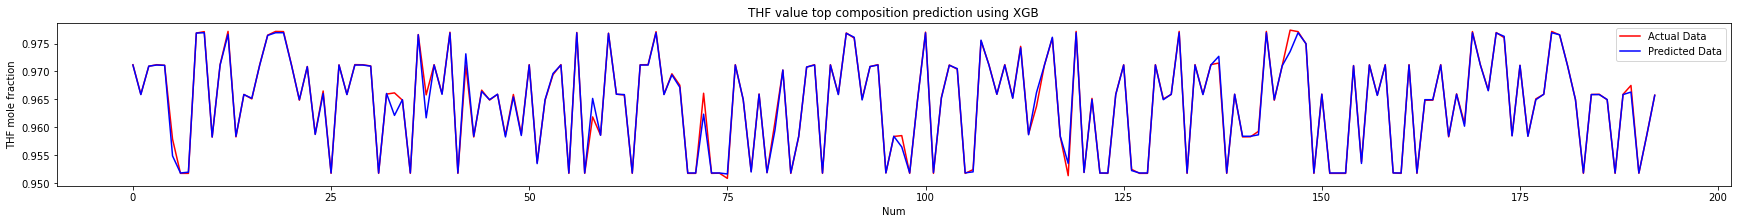

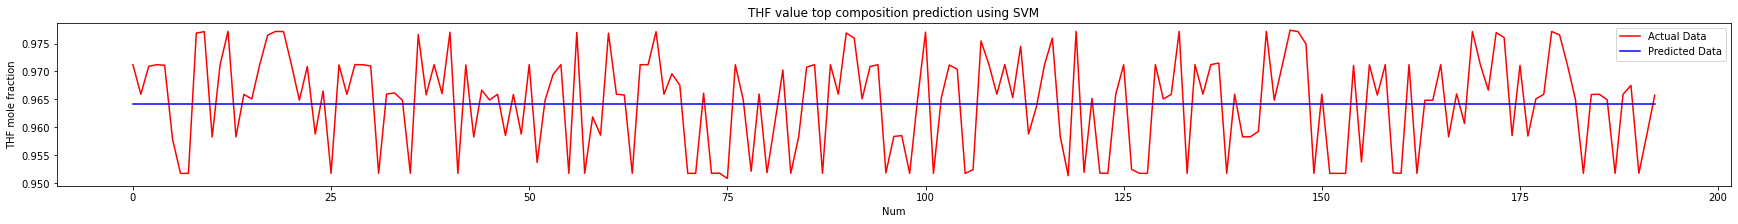

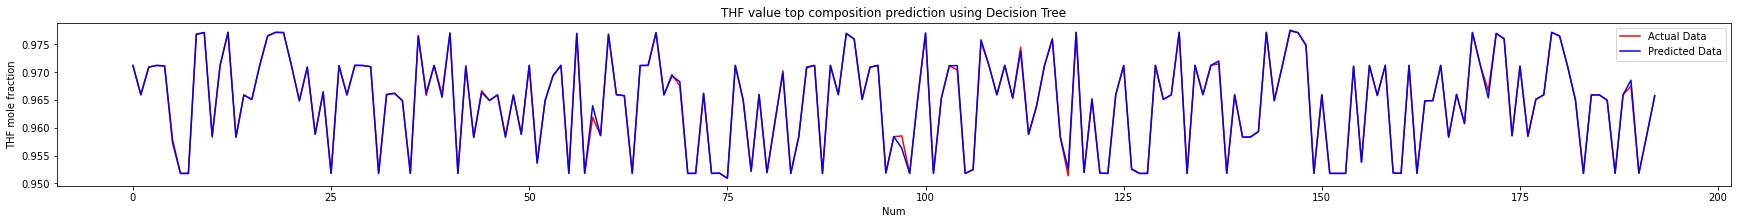

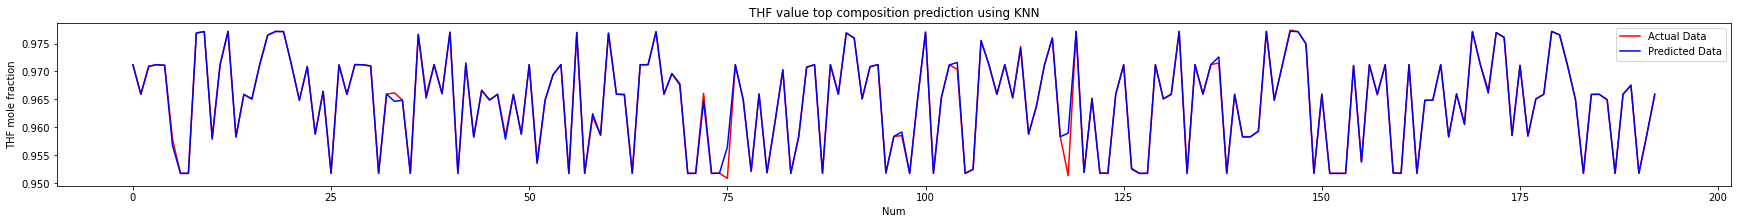

In [ ]:
plt.figure(figsize=(30,3))
plt.plot(y_test.values,
           'r', 
           y_pred_xgb,
           'b')
plt.legend(('Actual Data','Predicted Data'))
plt.title("THF value top composition prediction using XGB")
plt.ylabel("THF mole fraction")
plt.xlabel("Num")

plt.figure(figsize=(30,3))
plt.plot(y_test.values,
           'r', 
           y_pred_svm,
           'b')
plt.legend(('Actual Data','Predicted Data'))
plt.title("THF value top composition prediction using SVM")
plt.ylabel("THF mole fraction")
plt.xlabel("Num")

plt.figure(figsize=(30,3))
plt.plot(y_test.values,
           'r', 
           y_pred_tree,
           'b')
plt.legend(('Actual Data','Predicted Data'))
plt.title("THF value top composition prediction using Decision Tree")
plt.ylabel("THF mole fraction")
plt.xlabel("Num")

plt.figure(figsize=(30,3))
plt.plot(y_test.values,
           'r', 
           y_pred_knn,
           'b')
plt.legend(('Actual Data','Predicted Data'))
plt.title("THF value top composition prediction using KNN")
plt.ylabel("THF mole fraction")
plt.xlabel("Num")